# 导入数据库

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 输入图像 1 个通道, 6 个输出通道, 5x5 方形卷积核
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 一个线性映射: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 最大池化的 窗口大小(2, 2)
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 如果池化窗口是方形的，你只需要指定单个数字
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # 除了 batch 维 的所有纬度
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# 加载数据

In [2]:
import pickle
import gzip

with gzip.open(PATH / FILENAME, "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
# x_train's a numpy of 50000x784, y_train is label numpy of 50000 (一维)

# 显示一张图片

8


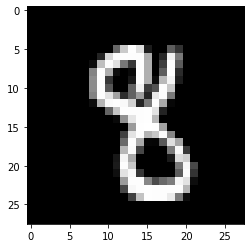

In [3]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[-1].reshape((28, 28)), cmap="gray")
print(y_train[-1])

# type of numpy.array to torch.tensor

In [4]:
import torch

(x_train, y_train, x_valid, y_valid) = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
(n, c) = x_train.shape
print(n,c)
# print(x_train.shape)
# print(y_train.min(), y_train.max())

50000 784


In [10]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
    return xb @ weights + bias

# 定义nn.Module的子类

In [11]:
from torch import nn
import math

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias# @表示矩阵乘积，相当于@

# 生成类实例

In [16]:
model = Mnist_Logistic()

In [17]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for
bs = 64 

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

NameError: name 'weights' is not defined